In [14]:
#Analysis

#Import libraries 
import pandas as pd
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest
import matplotlib as mpl
import matplotlib.pyplot as plt


In [15]:
#Cargar datos 

data = pd.read_csv(r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\dataset.csv')

# Convertir la columna "Fecha" a tipo datetime
data['date'] = pd.to_datetime(data['date'])


Index(['date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Comunidad', 'Provincia',
       'year_x', 'CPRO', 'year_y', 'Municipios',
       'Duración media del desplazamiento al trabajo (Minutos)',
       'Edad mediana de la población (años)',
       'Esperanza de vida al nacer (Años)',
       'Número de pernoctaciones turísticas anuales (Número)',
       'Número de plazas disponibles en establecimientos turísticos (Número)',
       'Número de viviendas convencionales según Catastro (Número)',
       'Número de viviendas convencionales según Censo (Número)',
       'Número medio de hijos por mujer (Número)',
       'Número total de hogares (Número)', 'Población residente (Personas)',
       'Porcentaje de desplazamien

C:\Users\34645\AppData\Local\Temp\ipykernel_16224\1951752278.py:3: DtypeWarning: Columns (16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\dataset.csv')


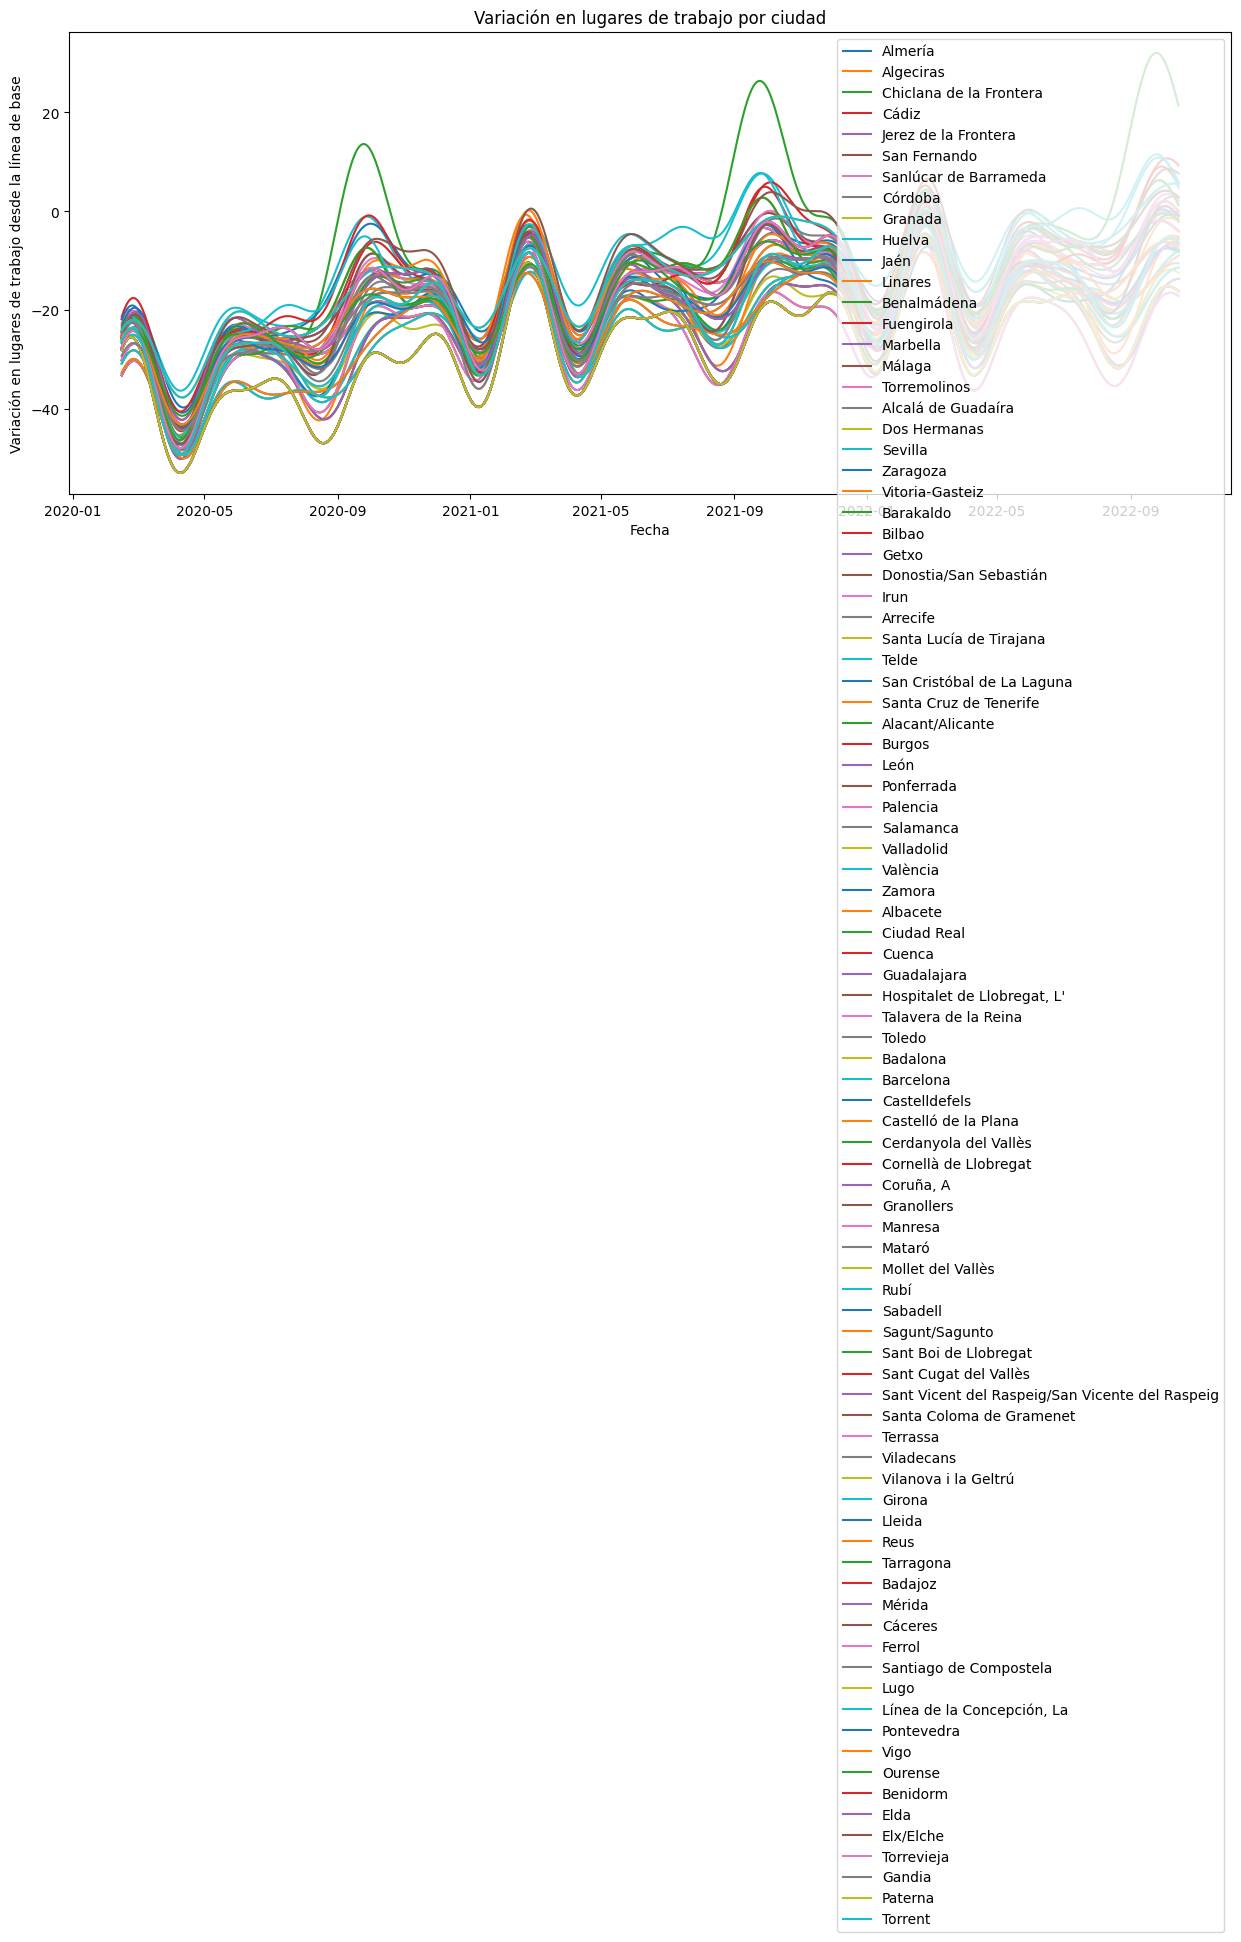

In [24]:
# Describir serie temporal del movimiento en las provincias españolas 
data.set_index('date', inplace=True, drop=False)
# Configura el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Dibuja una serie temporal para cada ciudad
municipios = data['Municipios'].unique()
for municipio in municipios:
    valores = data[data['Municipios'] == municipio]['trend_+_yearly']
    plt.plot(valores.index, valores.values, label= municipio)


# Configura etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Variación en lugares de trabajo desde la línea de base')
plt.title('Variación en lugares de trabajo por ciudad')
plt.legend()

# Muestra el gráfico
plt.show()

In [41]:
#Prueba pysyncon
municipios_control = valores_sin_zaragoza = [municipio for municipio in data['Municipios'].unique() if municipio != "Zaragoza"]


dataprep = Dataprep(
    foo=data,
    predictors=[
       
       'Edad mediana de la población (años)',
       'Esperanza de vida al nacer (Años)',
       'Número de pernoctaciones turísticas anuales (Número)',
       'Número de plazas disponibles en establecimientos turísticos (Número)',
       'Número de viviendas convencionales según Catastro (Número)',
       'Número medio de hijos por mujer (Número)',
       'Número total de hogares (Número)',
        'Población residente (Personas)',
       'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
       'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
       'Proporción de extranjeros sobre la población total (Porcentaje)',
       'Proporción de hogares de una persona sobre el total de hogares (Porcentaje)',
       'Superficie total (Km2)',
       'Tasa de desempleo (Porcentaje)',
       'Valor_Stringency',
       'Valor_EconomicSupportIndex',
       'Valor_Containment',
       'Uso del suelo (%): Tejido urbano residencial continuo',
       'Uso del suelo (%): Tejido urbano residencial discontinuo',
    ],
    predictors_op="mean",
    time_predictors_prior=range(26, 200),
    special_predictors=[
    ],
    dependent="trend_+_yearly",
    unit_variable="Municipios",
    time_variable="Periodo",
    treatment_identifier='Zaragoza',
    controls_identifier=municipios_control,
    time_optimize_ssr=range(1, 318),
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="ols")

c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:187: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(self.predictors_op)
c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


Almería                    0.007
Algeciras                  0.007
Chiclana de la Frontera    0.007
Cádiz                      0.007
Jerez de la Frontera       0.007
                           ...  
Elx/Elche                  0.007
Torrevieja                 0.007
Gandia                     0.007
Paterna                    0.007
Torrent                    0.007
Name: weights, Length: 89, dtype: float64


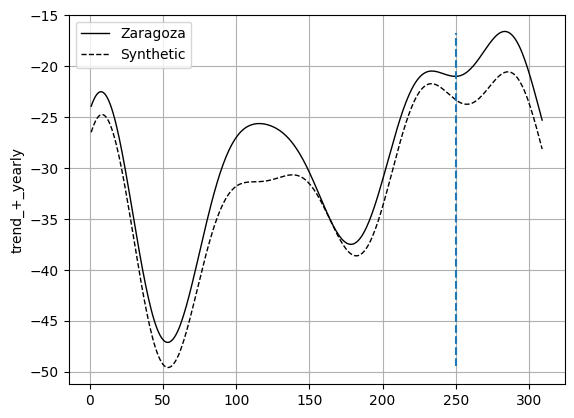

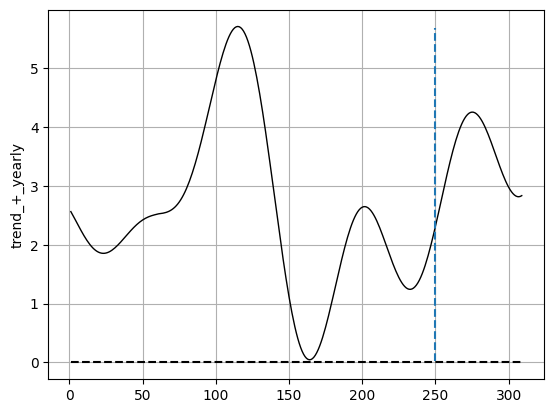

                                    V  treated  synthetic  sample mean
Número total de hogares (Número)  1.0  276.257    276.257       62.978


c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:187: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(self.predictors_op)
c:\Users\34645\Desktop\Doctorado_II\Códigos_Python\miproyecto\Lib\site-packages\pysyncon\dataprep.py:236: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X1_special = pd.Series(X1_special, index=X0_special_columns).rename(


In [43]:
print(synth.weights())
synth.path_plot(time_period=range(1, 310), treatment_time=250)
synth.gaps_plot(time_period=range(1, 310), treatment_time=250)
print(synth.summary())

resultados = synth.weights()
ruta_archivo_csv = r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\resultados.csv'
resultados.to_csv(ruta_archivo_csv, index=True) 
